<a href="https://colab.research.google.com/github/shubham29091997/prediction/blob/master/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os 
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [1]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,"{'min': 56, 'hour': 23, 'mday': 10, 'sec': 1, ...",1207871761,NaN,NaN,NaN,NaN,Redrover
37496,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,"{'min': 45, 'hour': 5, 'mday': 10, 'sec': 14, ...",1263102314,NaN,NaN,NaN,NaN,jmerloni
37497,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,"{'min': 3, 'hour': 1, 'mday': 25, 'sec': 36, '...",1067043816,NaN,NaN,NaN,NaN,UncleJimbo
37498,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,"{'min': 52, 'hour': 19, 'mday': 29, 'sec': 33,...",1296330753,NaN,NaN,NaN,NaN,Stockfan42


In [2]:
df.shape

(37500, 19)

In [3]:
df.columns


Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [4]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [6]:
df1 = df.drop(['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix',  'user/gender'], axis =1)
df1

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,"{'min': 56, 'hour': 23, 'mday': 10, 'sec': 1, ...",1207871761,Redrover
37496,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,"{'min': 45, 'hour': 5, 'mday': 10, 'sec': 14, ...",1263102314,jmerloni
37497,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,"{'min': 3, 'hour': 1, 'mday': 25, 'sec': 36, '...",1067043816,UncleJimbo
37498,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,"{'min': 52, 'hour': 19, 'mday': 29, 'sec': 33,...",1296330753,Stockfan42


In [7]:
df2 = df1.dropna()
df2

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,"{'min': 56, 'hour': 23, 'mday': 10, 'sec': 1, ...",1207871761,Redrover
37496,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,"{'min': 45, 'hour': 5, 'mday': 10, 'sec': 14, ...",1263102314,jmerloni
37497,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,"{'min': 3, 'hour': 1, 'mday': 25, 'sec': 36, '...",1067043816,UncleJimbo
37498,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,"{'min': 52, 'hour': 19, 'mday': 29, 'sec': 33,...",1296330753,Stockfan42


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37485 entries, 0 to 37499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37485 non-null  int64  
 1   beer/ABV           37485 non-null  float64
 2   beer/beerId        37485 non-null  int64  
 3   beer/brewerId      37485 non-null  int64  
 4   beer/name          37485 non-null  object 
 5   beer/style         37485 non-null  object 
 6   review/appearance  37485 non-null  float64
 7   review/aroma       37485 non-null  float64
 8   review/overall     37485 non-null  float64
 9   review/palate      37485 non-null  float64
 10  review/taste       37485 non-null  float64
 11  review/text        37485 non-null  object 
 12  review/timeStruct  37485 non-null  object 
 13  review/timeUnix    37485 non-null  int64  
 14  user/profileName   37485 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 4.6+ MB


In [9]:
df2.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix
count,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,3.748500e+04
mean,24951.304655,7.403323,21861.783273,3036.541897,3.899907,3.873096,3.889182,3.854689,3.922222,1.232791e+09
std,14434.301111,2.317991,18924.987319,5123.195293,0.588705,0.680798,0.700410,0.667995,0.716477,7.191560e+07
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,9.262944e+08
25%,12421.000000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.189177e+09
50%,24941.000000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.248158e+09
75%,37416.000000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.500000,4.500000,4.500000,1.291335e+09
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326267e+09


In [10]:
df2['beer/ABV'].unique()

array([ 5.  , 11.  ,  4.7 ,  4.4 , 10.  , 12.6 ,  8.4 ,  9.  ,  6.2 ,
        8.5 , 10.5 , 11.2 ,  7.  ,  8.3 ,  6.5 ,  9.2 ,  7.2 ,  6.  ,
        5.5 , 12.  ,  6.1 ,  4.75,  5.1 ,  8.6 ,  6.6 ,  6.9 ,  4.2 ,
        6.8 ,  5.4 ,  7.75, 10.2 ,  9.4 ,  4.8 ,  7.7 ,  9.5 ,  7.82,
        5.3 ,  4.3 ,  3.  ,  8.  , 10.6 ,  5.9 ,  6.7 ,  5.2 ,  4.19,
        5.7 ,  4.5 ,  3.8 ,  4.6 ,  3.5 ,  4.  ,  4.9 ,  8.1 ,  9.8 ,
        5.6 ,  5.8 ,  8.2 ,  6.3 ,  7.6 ,  5.79,  7.5 , 14.  , 12.5 ,
       10.8 ,  7.4 , 13.  ,  6.4 ,  7.1 , 10.4 ,  9.1 , 11.1 ,  5.59,
       15.  ,  3.75,  5.25,  5.11, 11.3 ,  7.3 ,  3.6 ,  8.9 ,  8.8 ,
        2.4 ,  9.7 , 10.9 ,  2.2 ,  9.9 ,  4.1 ,  3.9 ,  9.6 ,  1.5 ,
       10.75, 10.25, 11.5 ,  5.75,  7.8 ,  3.1 ,  4.55,  2.5 ,  7.9 ,
        4.25, 11.9 ,  3.7 , 39.44, 16.  , 12.9 , 10.3 ,  0.5 ,  9.3 ,
        2.8 ,  8.7 ,  5.47,  6.25,  4.37,  8.25,  0.1 ,  3.2 ,  7.26,
        7.25, 14.5 , 43.  ,  8.85,  6.32,  3.4 , 12.8 , 57.7 , 30.86])

In [11]:
#df2['beer/ABV'].describe()
df2['beer/ABV'].value_counts()

6.50     2095
5.00     2014
8.30     1889
6.60     1848
9.40     1846
         ... 
3.75        1
57.70       1
3.20        1
14.50       1
10.30       1
Name: beer/ABV, Length: 126, dtype: int64

In [12]:
df2.groupby('beer/ABV').size().sort_values().tail(15)

beer/ABV
10.0     899
7.0     1062
7.2     1132
10.5    1149
5.5     1191
4.4     1340
8.5     1348
11.2    1438
12.0    1499
5.4     1711
9.4     1846
6.6     1848
8.3     1889
5.0     2014
6.5     2095
dtype: int64

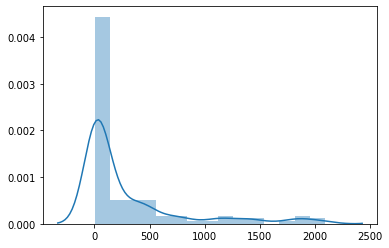

In [16]:
sns.distplot(df2.groupby('beer/ABV').size().sort_values())

In [17]:
df2['beer/beerId'].unique()

array([46634,  3003,   961, ..., 49959, 71810, 29697])

In [18]:
df2['beer/beerId'].value_counts()

11757    1882
19960    1438
5441     1063
16074    1051
7463      983
         ... 
63735       1
26853       1
42273       1
41116       1
67406       1
Name: beer/beerId, Length: 1731, dtype: int64

In [19]:
df2.groupby('beer/beerId').size().sort_values().tail(5)

beer/beerId
7463      983
16074    1051
5441     1063
19960    1438
11757    1882
dtype: int64

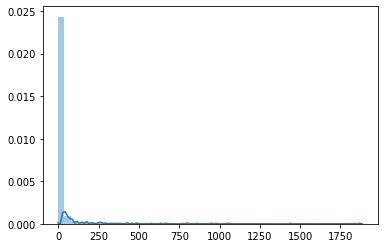

In [20]:
sns.distplot(df2.groupby('beer/beerId').size().sort_values())

In [21]:
df2['beer/brewerId'].unique()

array([14338,   395,   365,     1,  1417,    14, 14879,   394,  1386,
        1199,  6277, 16386,  3268,  1075, 11863, 27797,   263,  9020,
        1315,   807,    60,   568, 12224,   453, 24445, 10541,  1303,
         163,   577, 13228, 13831, 26990,   936, 23246,  2098,  5970,
         765,  3351, 21516,  2446,  3282, 14756,  2600,  1254,  3403,
        8802,  1616,  2916,  2647, 13397,   850,  5430,  6272,   289,
        7402, 16994,  2055,  9370,  1497, 16791,  2414, 20638,  9816,
       21138,  5500, 24486, 22167, 20658, 11203, 23020,  1068, 18012,
       24447, 20268, 21590,  5313,  5049,  6513,   860,  7091,  1482,
       24162,  1454,  2188,  2554, 15636,  1413, 13905, 16517,  2464,
       17285, 21841,  2430,  1463,  6245, 14649,  7536,   576, 13670,
       26946, 26983, 12003,   885,  2100, 21865, 22430,  9347, 14365,
       11715, 10103,  2412,  2724, 16859, 11710, 20988,  7104, 24757,
        2310, 16269,  2850,  2906, 16890, 25949, 23982,  5321,   971,
       23082, 27021,

In [22]:
df2['beer/brewerId'].value_counts()

1199     14968
394       2936
14879     2349
263       1809
3268      1277
         ...  
27133        1
15607        1
3207         1
3408         1
17783        1
Name: beer/brewerId, Length: 212, dtype: int64

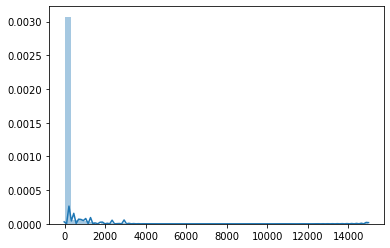

In [23]:
sns.distplot(df2.groupby('beer/brewerId').size().sort_values())

In [24]:
df2['beer/name'].unique()


array(['Chiostro', "Bearded Pat's Barleywine", "Naughty Nellie's Ale",
       ..., 'Pszeniczne', 'Cauldron Brew',
       'MoJo Belgian Style Abbey Dubbel'], dtype=object)

In [25]:
df2['beer/name'].value_counts()

Founders Breakfast Stout                   1882
Founders KBS (Kentucky Breakfast Stout)    1438
Founders Centennial IPA                    1063
Founders Red's Rye PA                      1051
Founders Dirty Bastard                      983
                                           ... 
Gemini Double Trouble                         1
Scarampola Nivura                             1
Dubble Overtime                               1
Devanha Scottish XXX Ale                      1
LIDO GaiÂais                                 1
Name: beer/name, Length: 1688, dtype: int64

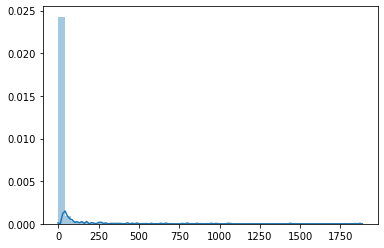

In [26]:
sns.distplot(df2.groupby('beer/name').size().sort_values())

In [30]:
import spacy 
en_nlp = spacy.load('en')
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

In [31]:
tfidf2 = TfidfVectorizer(strip_accents='unicode',lowercase=True,ngram_range=(1,2),max_df=0.7,min_df=5,tokenizer = custom_tokenizer) 

genre_sparse_matrix = tfidf2.fit_transform(df2['beer/name'])

ts2= TruncatedSVD(n_components = 3)
genre_features = ts2.fit_transform(genre_sparse_matrix)

#genre_cols = ['Genre'+str(i) for i in range(3)]
# genre_cols

df_new = pd.DataFrame(genre_features)

df_new

,0,1,2
0,1.314149e-11,8.902600e-11,3.828934e-10
1,4.306982e-03,2.392792e-02,1.924119e-02
2,9.045189e-03,4.958613e-02,6.975018e-02
3,9.453647e-05,-4.273333e-03,1.940110e-03
4,5.351434e-02,8.930816e-03,1.730542e-01
...,...,...,...
37480,2.315024e-03,5.109377e-03,-5.227852e-03
37481,1.670805e-01,4.872200e-01,-1.708501e-01
37482,1.417782e-02,6.410484e-02,9.157604e-02
37483,6.901627e-01,-2.692399e-01,4.643609e-01


In [32]:
df2['beer/style'].unique()


array(['Herbed / Spiced Beer', 'American Barleywine',
       'American Pale Ale (APA)', 'Czech Pilsener', 'English Pale Ale',
       'Russian Imperial Stout', 'American Wild Ale', 'Pumpkin Ale',
       'English Barleywine', 'American IPA', 'Scotch Ale / Wee Heavy',
       'American Double / Imperial Stout', 'Euro Pale Lager',
       'Maibock / Helles Bock', 'American Amber / Red Ale', 'Rye Beer',
       'American Double / Imperial IPA', 'MÃ¤rzen / Oktoberfest',
       'Fruit / Vegetable Beer', 'Witbier', 'Light Lager', 'Rauchbier',
       'American Porter', 'Hefeweizen',
       'Extra Special / Strong Bitter (ESB)', 'Wheatwine',
       'English Strong Ale', 'Braggot', 'Euro Strong Lager',
       'Munich Helles Lager', 'English India Pale Ale (IPA)', 'Altbier',
       'Doppelbock', 'American Brown Ale', 'Munich Dunkel Lager',
       'Irish Dry Stout', 'KÃ¶lsch', 'Foreign / Export Stout',
       'Cream Ale', 'Lambic - Unblended', 'Scottish Ale', 'Baltic Porter',
       'Belgian IPA', 'Ol

In [33]:
df2['beer/style'].value_counts()

American Double / Imperial Stout    4490
American IPA                        3048
American Double / Imperial IPA      2871
Scotch Ale / Wee Heavy              2133
Russian Imperial Stout              2030
                                    ... 
Kristalweizen                          6
Berliner Weissbier                     6
Eisbock                                5
BiÃ¨re de Garde                        4
Flanders Red Ale                       2
Name: beer/style, Length: 95, dtype: int64

In [34]:
tfidf = TfidfVectorizer(strip_accents = 'unicode' , lowercase=True,ngram_range=(1,3),max_df=0.7,min_df=5,tokenizer=custom_tokenizer)
sparse_matrix = tfidf.fit_transform(df2['beer/style'])

ts = TruncatedSVD(n_components = 3)
style_features = ts.fit_transform(sparse_matrix)

df_new2 = pd.DataFrame(style_features)
df_new2

,0,1,2
0,2.619909e-02,-0.006502,0.018988
1,7.369274e-02,0.105151,0.003534
2,4.827845e-02,0.102679,0.284195
3,-8.099101e-07,-0.000036,-0.000271
4,5.729746e-03,0.021576,0.207918
...,...,...,...
37480,4.683830e-02,-0.013832,0.049347
37481,6.072993e-02,-0.019032,0.945187
37482,4.351788e-02,-0.011181,0.032700
37483,9.382209e-01,-0.225795,-0.018446


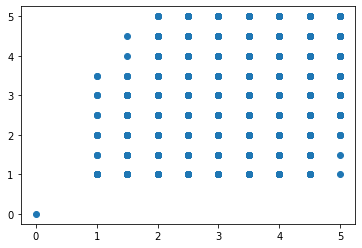

In [35]:
plt.scatter(df2['review/appearance'],df2['review/overall'])


In [36]:
column1 = df2['review/appearance']
column2 = df2['review/overall']
corelation = column2.corr(column1)
print(corelation)

0.4986083151520517


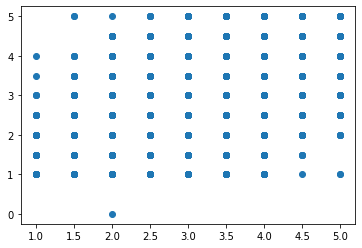

In [37]:
plt.scatter(df2['review/aroma'],df2['review/overall'])


In [38]:
column1 = df2['review/aroma']
column2 = df2['review/overall']
corelation = column2.corr(column1)
print(corelation)

0.6160750078613497


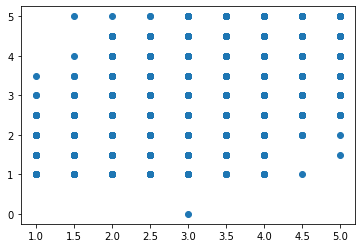

In [39]:
plt.scatter(df2['review/palate'],df2['review/overall'])


In [40]:
column1 = df2['review/palate']
column2 = df2['review/overall']
corelation = column2.corr(column1)
print(corelation)

0.6972221490154391


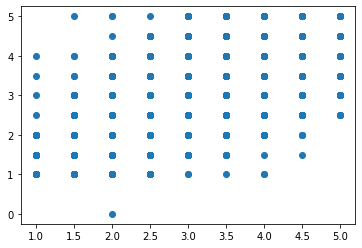

In [41]:
plt.scatter(df2['review/taste'],df2['review/overall'])


In [42]:
column1 = df2['review/taste']
column2 = df2['review/overall']
corelation = column2.corr(column1)
print(corelation)

0.7851822417770992


In [43]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
def remove_punc(text):
  txt_nopunc = "".join([c for c in text if c not in string.punctuation])
  return txt_nopunc


  

In [45]:
 df4 = df2['review/text'].apply(lambda x : remove_punc(x) )
 df4

0        Pours a clouded gold with a thin white head No...
1        12oz bottle into 8oz snifter\t\tDeep ruby red ...
2        First enjoyed at the brewpub about 2 years ago...
3        First thing I noticed after pouring from green...
4        A pours an amber with a one finger head but on...
                               ...                        
37495    12 oz brown longneck with no freshness dating\...
37496    A  A bright red with a maroonamber hue minimal...
37497    Sampled on tap at Redbones\t\tThis marzen styl...
37498    Pours a black body with a brown head that very...
37499    A nice sweet malty beernothing complex just a ...
Name: review/text, Length: 37485, dtype: object

In [46]:
import re 

def tokenize(text):
  tokens = re.split('\W+' , text)
  return tokens
df5 = df4.apply(lambda x : tokenize(x.lower()))
df5

0        [pours, a, clouded, gold, with, a, thin, white...
1        [12oz, bottle, into, 8oz, snifter, deep, ruby,...
2        [first, enjoyed, at, the, brewpub, about, 2, y...
3        [first, thing, i, noticed, after, pouring, fro...
4        [a, pours, an, amber, with, a, one, finger, he...
                               ...                        
37495    [12, oz, brown, longneck, with, no, freshness,...
37496    [a, a, bright, red, with, a, maroonamber, hue,...
37497    [sampled, on, tap, at, redbones, this, marzen,...
37498    [pours, a, black, body, with, a, brown, head, ...
37499    [a, nice, sweet, malty, beernothing, complex, ...
Name: review/text, Length: 37485, dtype: object

In [47]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text_tokenized):
  text_clean = [word for word in text_tokenized if word not in stopwords]
  return text_clean

df6 = df5.apply(lambda x : remove_stopwords(x))  
df6

0        [pours, clouded, gold, thin, white, head, nose...
1        [12oz, bottle, 8oz, snifter, deep, ruby, red, ...
2        [first, enjoyed, brewpub, 2, years, ago, final...
3        [first, thing, noticed, pouring, green, bottle...
4        [pours, amber, one, finger, head, strong, pour...
                               ...                        
37495    [12, oz, brown, longneck, freshness, dating, p...
37496    [bright, red, maroonamber, hue, minimal, light...
37497    [sampled, tap, redbones, marzen, style, beer, ...
37498    [pours, black, body, brown, head, quickly, fiz...
37499    [nice, sweet, malty, beernothing, complex, smo...
Name: review/text, Length: 37485, dtype: object

In [49]:
tfidf_text = TfidfVectorizer(strip_accents = 'unicode' , lowercase=True,ngram_range=(1,3),max_df=0.7,min_df=5,tokenizer=custom_tokenizer)
matrix = tfidf_text.fit_transform(df2['review/text'])

ts3 = TruncatedSVD(n_components = 15)
review_features = ts3.fit_transform(matrix)

df_new3 = pd.DataFrame(review_features)
df_new3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.107649,-0.039305,0.007633,0.002802,-0.021625,-0.000917,-0.012502,0.012179,0.013967,-0.005744,-0.010901,0.019268,0.007601,0.013412,-0.004254
1,0.178401,-0.014855,0.045979,-0.033373,-0.013940,-0.026626,-0.020024,-0.012821,0.052947,-0.060676,0.007669,-0.013806,0.030794,-0.053818,-0.012136
2,0.106478,0.014668,0.117831,0.156260,0.053141,0.059299,0.012735,-0.002667,-0.017935,-0.011344,-0.024004,0.009220,0.015101,0.009484,-0.010777
3,0.086247,-0.026850,-0.017926,0.006075,-0.021685,0.003762,0.024743,-0.004682,-0.026133,-0.030382,0.014751,0.019999,0.016501,-0.020035,-0.027761
4,0.159874,0.080461,-0.016373,0.105746,-0.034149,0.038477,-0.031868,0.001540,0.030598,-0.037038,0.025878,-0.003452,-0.010701,0.010528,0.003451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,0.125524,-0.034927,0.008045,-0.014745,-0.012001,-0.031383,-0.017742,-0.026329,0.021758,0.000185,0.003333,0.028676,0.024956,-0.063290,-0.034094
37481,0.189117,0.010351,0.001588,-0.059669,0.043243,0.081483,0.004093,-0.036739,-0.028657,0.015111,0.017730,0.011214,-0.025931,0.037592,0.001937
37482,0.150229,-0.035723,0.088741,-0.018432,-0.023590,-0.065558,-0.058301,-0.046634,0.027835,0.079362,-0.004462,-0.003085,-0.035120,-0.017420,-0.014115
37483,0.161344,-0.028737,-0.065437,-0.010453,0.067538,-0.054612,0.020028,-0.022392,-0.026773,-0.023210,-0.003288,0.024595,-0.023640,-0.010588,-0.006550


In [50]:
df2['user/profileName'].unique()

array(['RblWthACoz', 'BeerSox', 'mschofield', ..., 'Antikythera', 'JAA',
       'dvsbizzyb'], dtype=object)

In [51]:
df2['user/profileName'].value_counts()

northyorksammy    141
BuckeyeNation     110
mikesgroove        92
ChainGangGuy       84
MasterSki          83
                 ... 
Elendinn            1
Barleythenred       1
GrizzlyBehr         1
timholio            1
lookitsfelias       1
Name: user/profileName, Length: 7439, dtype: int64

In [52]:
df2["review/taste"]

0        4.0
1        3.0
2        3.5
3        3.0
4        2.5
        ... 
37495    3.5
37496    4.5
37497    4.0
37498    5.0
37499    4.0
Name: review/taste, Length: 37485, dtype: float64

In [53]:
frames = [df_new, df_new2 , df_new3, df2['review/taste'] ,df2['review/appearance'] , df2['review/aroma'] , df2['review/palate'] ,df2['review/overall'] ]
result = pd.concat(frames, axis=1)
result

features = result.dropna()
features

,0,1,2,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,review/taste,review/appearance,review/aroma,review/palate,review/overall
0,1.314149e-11,8.902600e-11,3.828934e-10,2.619909e-02,-0.006502,0.018988,0.107649,-0.039305,0.007633,0.002802,-0.021625,-0.000917,-0.012502,0.012179,0.013967,-0.005744,-0.010901,0.019268,0.007601,0.013412,-0.004254,4.0,4.0,4.0,4.0,4.0
1,4.306982e-03,2.392792e-02,1.924119e-02,7.369274e-02,0.105151,0.003534,0.178401,-0.014855,0.045979,-0.033373,-0.013940,-0.026626,-0.020024,-0.012821,0.052947,-0.060676,0.007669,-0.013806,0.030794,-0.053818,-0.012136,3.0,4.0,3.5,3.5,3.5
2,9.045189e-03,4.958613e-02,6.975018e-02,4.827845e-02,0.102679,0.284195,0.106478,0.014668,0.117831,0.156260,0.053141,0.059299,0.012735,-0.002667,-0.017935,-0.011344,-0.024004,0.009220,0.015101,0.009484,-0.010777,3.5,3.5,4.0,3.5,3.5
3,9.453647e-05,-4.273333e-03,1.940110e-03,-8.099101e-07,-0.000036,-0.000271,0.086247,-0.026850,-0.017926,0.006075,-0.021685,0.003762,0.024743,-0.004682,-0.026133,-0.030382,0.014751,0.019999,0.016501,-0.020035,-0.027761,3.0,3.0,3.0,3.0,2.5
4,5.351434e-02,8.930816e-03,1.730542e-01,5.729746e-03,0.021576,0.207918,0.159874,0.080461,-0.016373,0.105746,-0.034149,0.038477,-0.031868,0.001540,0.030598,-0.037038,0.025878,-0.003452,-0.010701,0.010528,0.003451,2.5,4.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,2.315024e-03,5.109377e-03,-5.227852e-03,4.683830e-02,-0.013832,0.049347,0.125524,-0.034927,0.008045,-0.014745,-0.012001,-0.031383,-0.017742,-0.026329,0.021758,0.000185,0.003333,0.028676,0.024956,-0.063290,-0.034094,3.5,4.0,3.5,3.0,3.5
37481,1.670805e-01,4.872200e-01,-1.708501e-01,6.072993e-02,-0.019032,0.945187,0.189117,0.010351,0.001588,-0.059669,0.043243,0.081483,0.004093,-0.036739,-0.028657,0.015111,0.017730,0.011214,-0.025931,0.037592,0.001937,3.5,4.0,3.5,4.0,3.5
37482,1.417782e-02,6.410484e-02,9.157604e-02,4.351788e-02,-0.011181,0.032700,0.150229,-0.035723,0.088741,-0.018432,-0.023590,-0.065558,-0.058301,-0.046634,0.027835,0.079362,-0.004462,-0.003085,-0.035120,-0.017420,-0.014115,5.0,3.5,4.5,4.0,4.5
37483,6.901627e-01,-2.692399e-01,4.643609e-01,9.382209e-01,-0.225795,-0.018446,0.161344,-0.028737,-0.065437,-0.010453,0.067538,-0.054612,0.020028,-0.022392,-0.026773,-0.023210,-0.003288,0.024595,-0.023640,-0.010588,-0.006550,3.5,4.5,2.5,4.5,4.0


In [54]:
x = features.drop('review/overall' , axis =1).values
y = features['review/overall'].values

In [55]:
from sklearn.preprocessing import scale
x_scaled = scale(x)
y_scaled = scale(y)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

reg_all = LinearRegression()
reg_all.fit(x_train , y_train)
y_pred = reg_all.predict(x_test)
reg_all.score(x_test , y_test)

0.6512090051559006

In [63]:
from sklearn.tree import DecisionTreeRegressor
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
dt = DecisionTreeRegressor(max_depth=5,  random_state=6)
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
dt.score(x_test , y_test)

0.651108290112234

In [59]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

print(metrics.mean_squared_log_error(y_test, y_pred))

0.30967443457693106
0.16948478641873943
0.008395402267805309


In [61]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg_all , x, y,  cv=5 )
print(cv_results)

[0.64935183 0.66069055 0.65527448 0.64487787 0.64995884]
